## Panda Data Testing Using MiniBooNE Dataset
<a href="https://pbs.twimg.com/media/C4f3GF6WAAAY1Ok.jpg:large">Pandas cheat sheet for reference</a>
<img src="https://pbs.twimg.com/media/C4f3GF6WAAAY1Ok.jpg:large" >

<br>
<br>
What follows is an example of pandas usage using the MiniBooNE PID dataset from: https://archive.ics.uci.edu/ml/datasets/MiniBooNE+particle+identification


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab
import seaborn as sns

#Plot formatting for presentation
plt.style.use(['bmh'])

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

#Load the header information from the text file
#The header contains the number of signal and background events
mbsigback=pd.read_table("MiniBooNE_PID.txt", delimiter=r"\s+", nrows=1, header=None)
nsig=mbsigback[0][0]
nback=mbsigback[1][0]

#Load the signal and background into separate dataframes
mbsig=pd.read_table("MiniBooNE_PID.txt", delimiter=r"\s+", nrows=1000, skiprows=1, header=None)
mbback=pd.read_table("MiniBooNE_PID.txt", delimiter=r"\s+", nrows=1000, skiprows=1+nsig, header=None)

#Add labels column to mbsig and mbback (0 = signal, 1 = background)
mbsig['sigback'] = pd.Series([0 for x in range(len(mbsig.index))], index=mbsig.index)
mbback['sigback'] = pd.Series([1 for x in range(len(mbback.index))], index=mbback.index)

#Merge the dataframes into one
mball=pd.concat([mbsig,mbback]) 

#Clean default values from the dataset (remove entries with -999.00 in any field)
for col in mball:
    mball=mball[mball[col]!=-999.00]
    
#Rescale data to be from 0 to 1
norm_cols = [i for i in range(50)]
mball[norm_cols] = mball[norm_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [15]:
print("Total signal entries:", nsig)
print("Total background entries:", nback)



Total signal entries: 36499
Total background entries: 93565


In [14]:
mbsig.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,sigback
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,3.807219,0.956074,166.617282,0.249521,0.014076,0.243163,1.181958,0.867801,3.320448,0.197526,...,-7.415499,0.606718,4.572601,0.002644,0.153596,0.000251,1.770367,0.706749,0.237258,0.0
std,0.716938,0.746325,391.517913,0.031336,0.013388,0.158932,0.290658,0.050221,0.215354,0.040441,...,25.949539,0.978780,2.390973,0.010699,0.054820,0.457269,1.241574,0.945119,0.047473,0.0
min,2.399560,0.093330,0.101678,0.164130,-0.001866,0.000000,0.415171,0.539654,2.433410,0.095538,...,-152.735000,-1.092480,0.774474,0.000000,0.044514,-5.447920,0.069486,-0.631213,0.064666,0.0
25%,3.235918,0.437744,16.040200,0.230816,0.004425,0.129263,0.970227,0.843008,3.192258,0.170952,...,-21.388675,-0.044486,2.914310,0.000000,0.113582,-0.162898,0.909779,0.045486,0.208531,0.0
50%,3.784545,0.726002,40.166700,0.247299,0.010480,0.256252,1.173295,0.877639,3.313545,0.195386,...,-9.255075,0.385418,4.146865,0.000000,0.144804,0.084841,1.383940,0.341204,0.238747,0.0
75%,4.290980,1.285023,125.163000,0.264105,0.020253,0.375497,1.369832,0.902039,3.445873,0.222191,...,5.497397,1.016220,5.815148,0.001313,0.183172,0.274552,2.311602,1.090853,0.266231,0.0
max,7.355150,5.555810,4622.800000,0.453926,0.096603,0.590068,2.196180,0.977329,3.992330,0.405914,...,111.531000,8.343110,18.444600,0.139651,0.435779,1.012760,8.429430,5.893840,0.432352,0.0


In [9]:
mbback.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,sigback
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,1.226766,-2.290173,108.718552,-3.701956,-3.988809,-3.865279,-3.100932,-3.191325,-0.502434,-3.831725,...,-31.577648,-3.279989,2.623599,-3.985017,-3.809731,-4.209465,-0.808515,-2.043891,-3.767176,1.0
std,63.426193,63.200396,96.507816,63.106040,63.087825,63.095719,63.144961,63.138422,63.309353,63.097797,...,69.819732,63.142633,63.701700,63.088072,63.099238,63.082649,63.317937,63.245553,63.101900,0.0
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,1.0
25%,4.595740,1.205432,79.762825,0.253942,0.000000,0.082392,0.673353,0.770315,3.354800,0.136069,...,-43.424300,-0.036714,3.824010,0.000000,0.125475,-0.455118,1.776887,0.541186,0.197118,1.0
50%,5.205390,1.598375,114.631500,0.290275,0.003697,0.131984,0.838151,0.818736,3.475430,0.162424,...,-27.461850,0.434883,5.224830,0.000000,0.180750,0.010206,2.809260,1.483920,0.228355,1.0
75%,5.859505,2.071192,137.348000,0.329397,0.009124,0.169243,1.053480,0.854253,3.618730,0.187434,...,-9.713248,1.186550,7.715953,0.002488,0.238759,0.298777,4.086067,2.771030,0.263090,1.0
max,9.318040,6.452360,1137.960000,0.590979,0.103853,0.607889,3.225860,0.928466,5.548740,0.412486,...,92.452300,8.102330,66.195400,0.318501,0.499579,1.323650,13.906300,17.062000,0.469428,1.0


In [10]:
mball.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,sigback
count,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,...,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1996.000000
mean,-3.966099e-15,-5.004625e-16,-1.484037e-15,7.230689e-15,-1.780139e-15,-1.179111e-15,1.300174e-15,2.585385e-15,-4.687689e-15,-3.583751e-16,...,3.415354e-16,-6.641314e-17,1.458072e-16,-2.177839e-15,-2.839523e-15,1.270833e-16,6.325935e-16,-1.319808e-15,-7.132043e-15,0.498998
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500124
min,-1.891632e+00,-1.451236e+00,-4.954567e-01,-2.753572e+00,-5.154455e+00,-1.332467e+00,-2.633132e+00,-6.913194e+00,-3.928020e+00,-2.848759e+00,...,-7.160271e+00,-1.703821e+00,-1.195736e+00,-2.842859e-01,-2.289595e+00,-1.450261e+01,-1.373899e+00,-6.709365e+00,-3.623651e+00,0.000000
25%,-7.513512e-01,-7.642608e-01,-3.877392e-01,-6.564089e-01,-6.732228e-01,-6.613718e-01,-7.450146e-01,-5.719074e-01,-6.148994e-01,-7.100958e-01,...,-5.195612e-01,-6.688908e-01,-5.611192e-01,-2.842859e-01,-7.074579e-01,-2.059988e-01,-7.519782e-01,-6.777152e-01,-6.039822e-01,0.000000
50%,-9.895926e-02,-1.165139e-01,-1.700831e-01,-2.234696e-01,-3.385697e-01,-2.076138e-01,-7.860450e-02,1.831103e-01,-7.127467e-02,-5.844715e-02,...,3.042607e-02,-2.406573e-01,-2.429008e-01,-2.842859e-01,-1.442573e-01,1.956945e-01,-2.470973e-01,-2.786192e-01,7.261385e-03,0.000000
75%,6.550537e-01,5.279077e-01,-1.165730e-02,5.215258e-01,3.506378e-01,6.852754e-01,6.696336e-01,7.375984e-01,5.442558e-01,5.937402e-01,...,5.144893e-01,4.231111e-01,2.318495e-01,-2.132553e-01,5.545086e-01,4.794508e-01,4.324141e-01,3.584150e-01,6.185539e-01,1.000000
max,4.268565e+00,5.989338e+00,1.588240e+01,5.994344e+00,7.351861e+00,2.991721e+00,6.426329e+00,2.112784e+00,8.553383e+00,5.300821e+00,...,4.087399e+00,7.300496e+00,1.499063e+01,1.297828e+01,4.428043e+00,1.743561e+00,6.499827e+00,9.052663e+00,4.622351e+00,1.000000


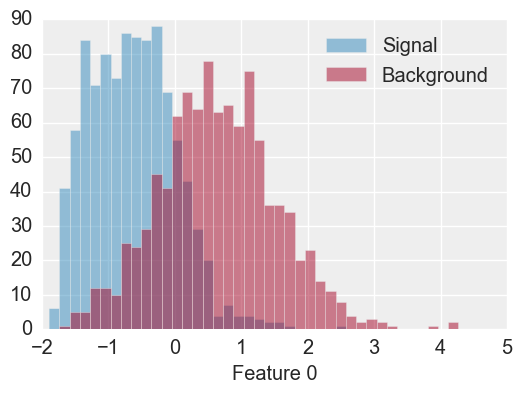

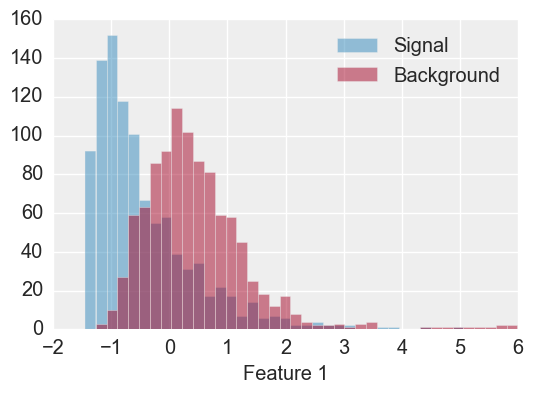

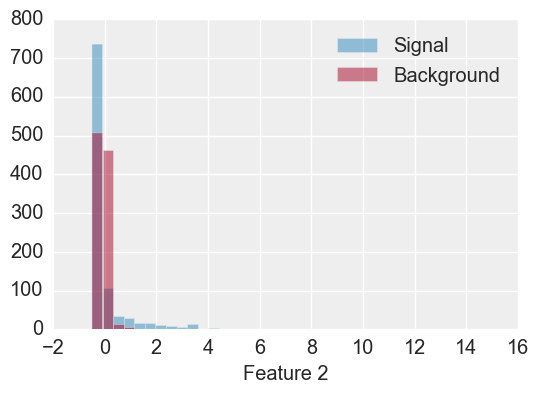

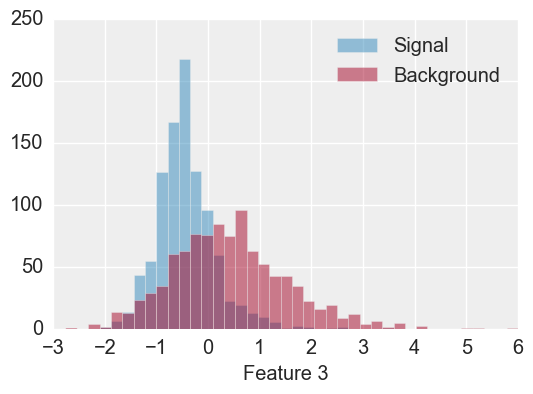

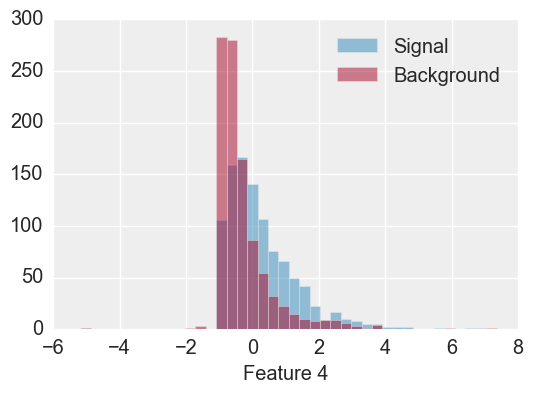

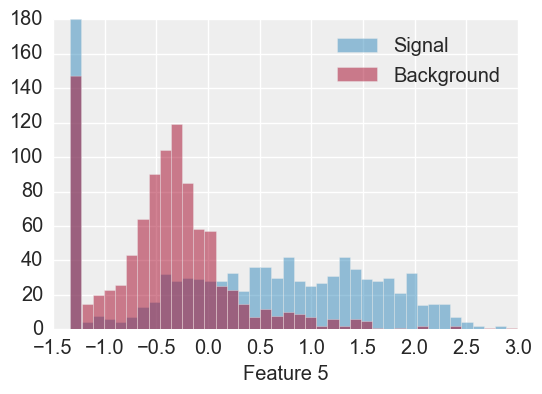

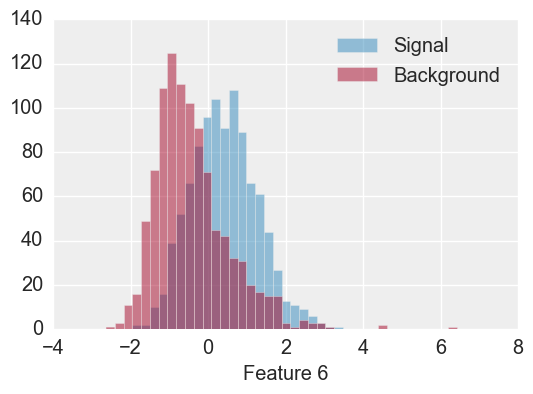

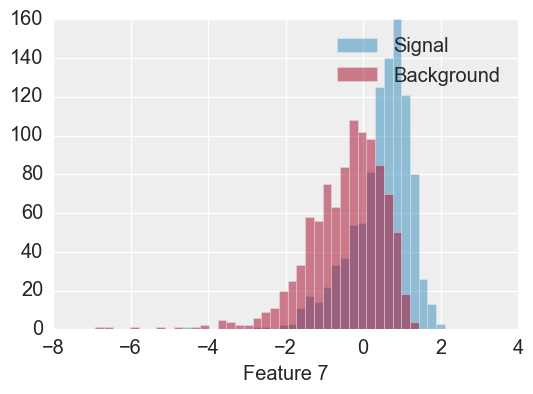

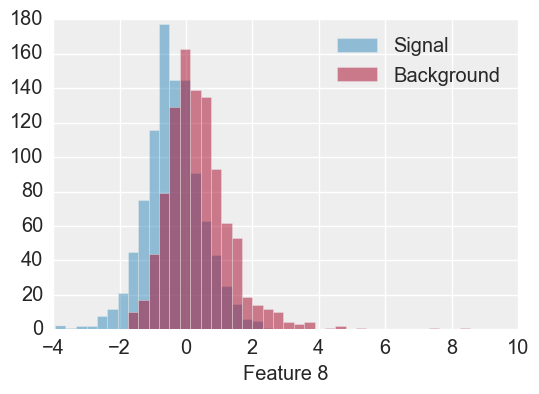

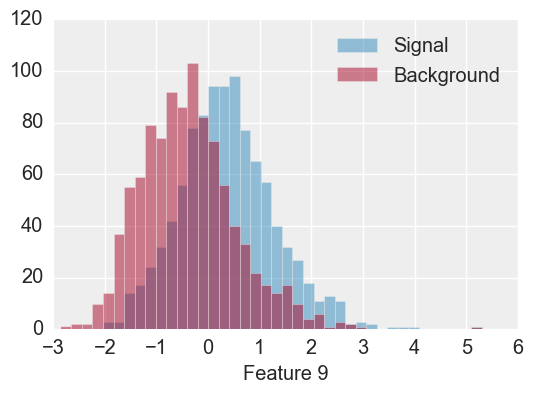

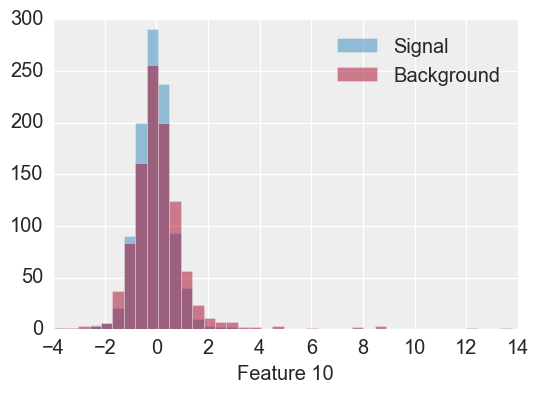

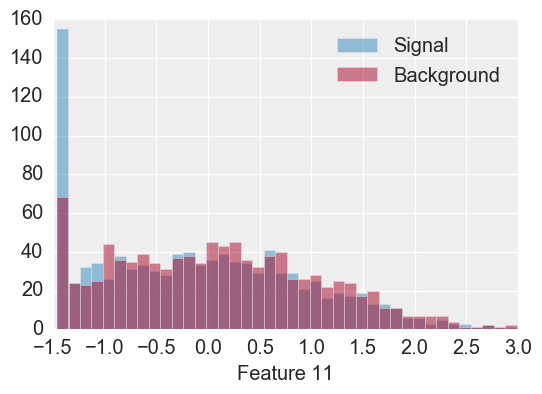

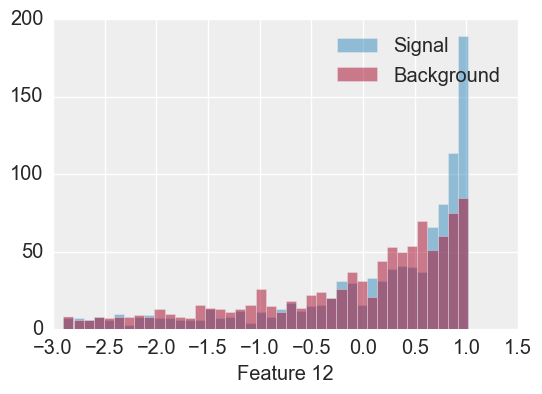

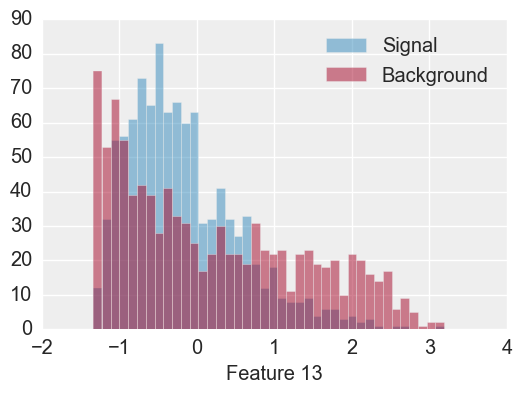

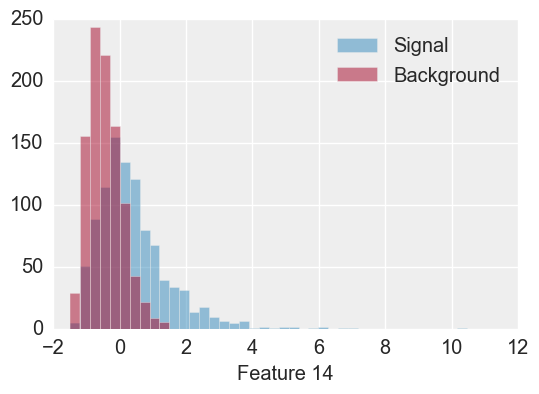

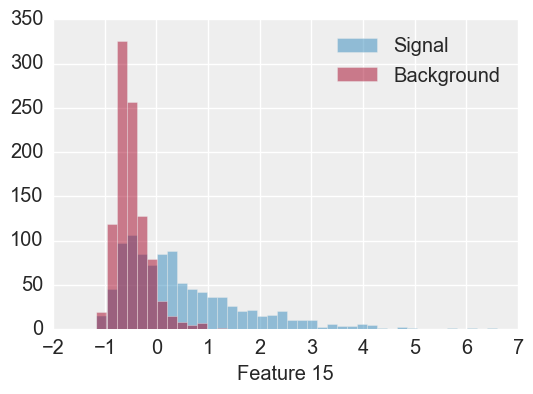

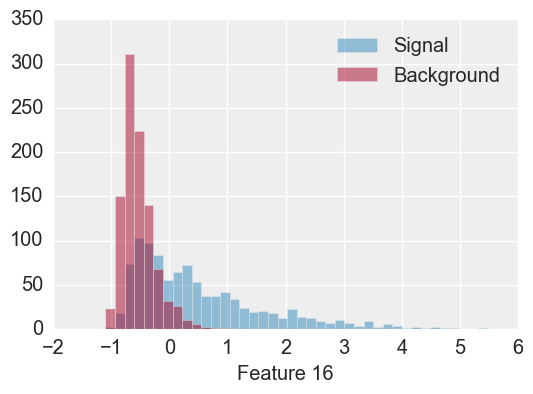

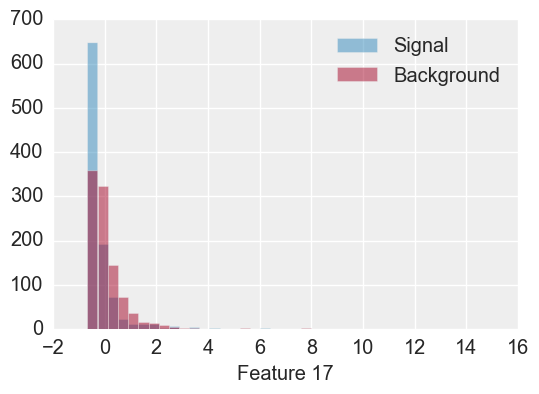

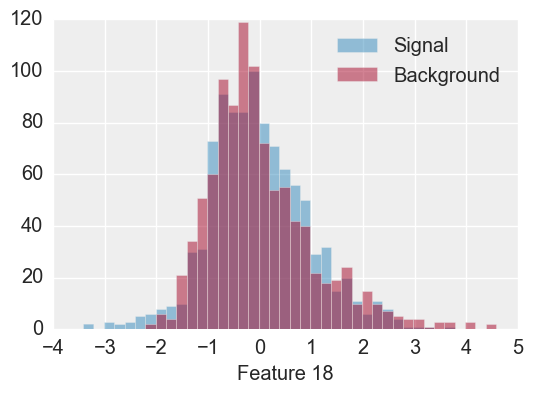

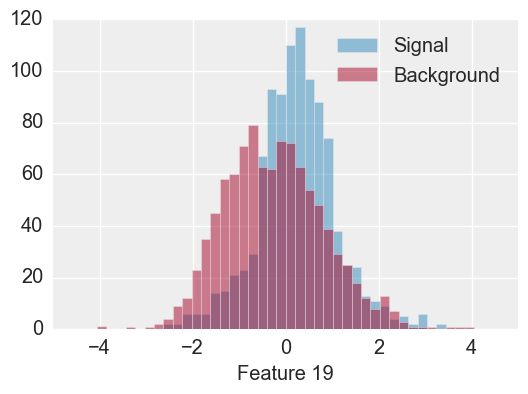

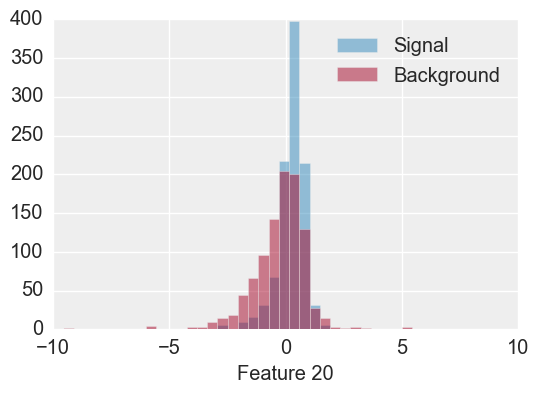

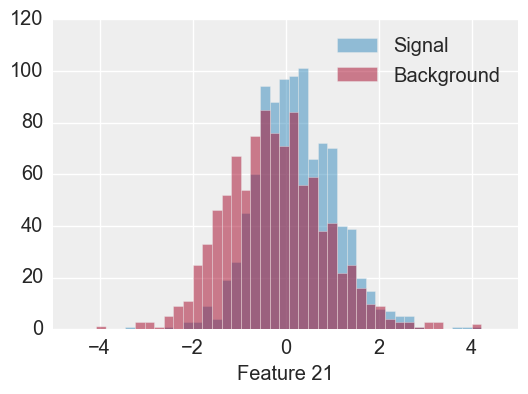

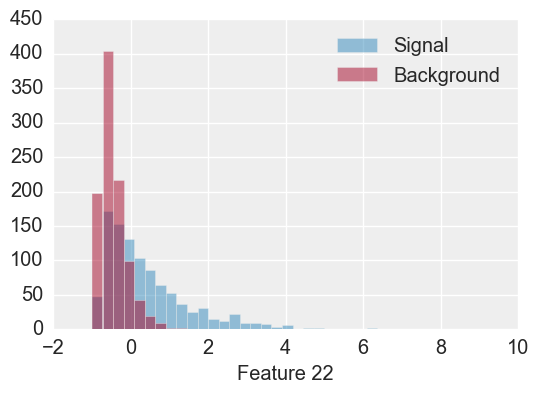

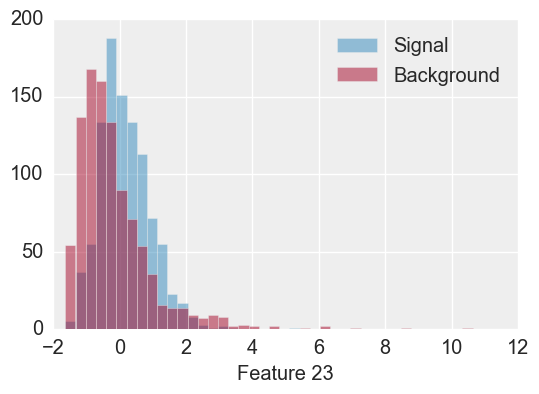

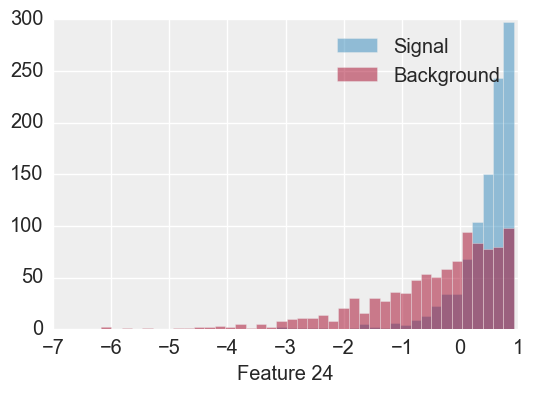

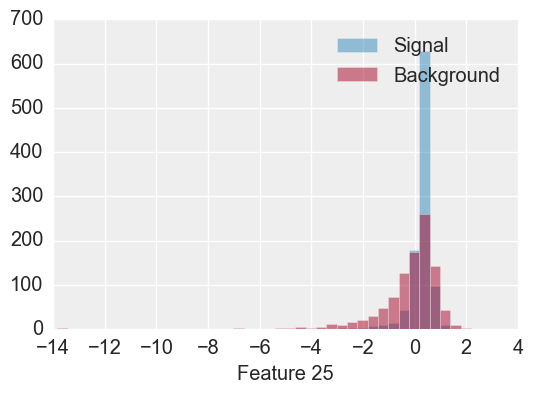

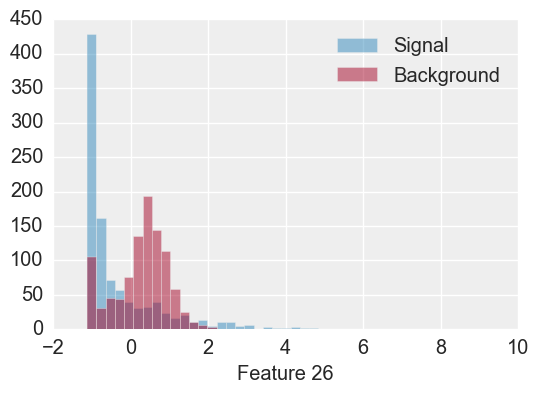

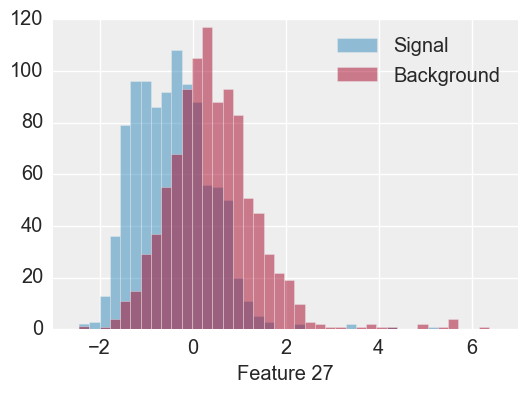

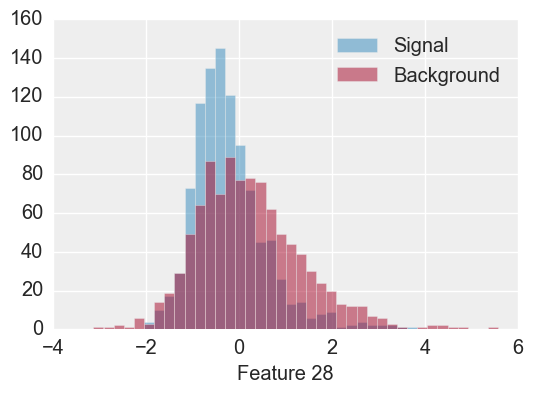

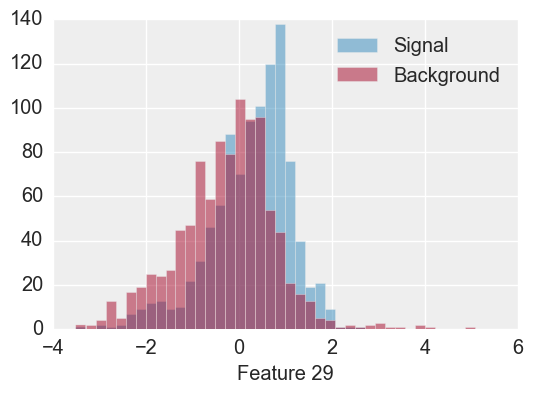

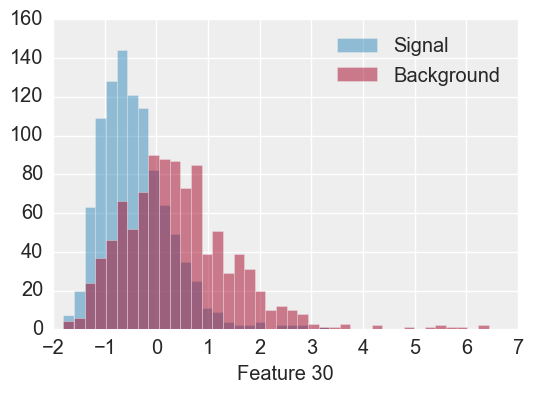

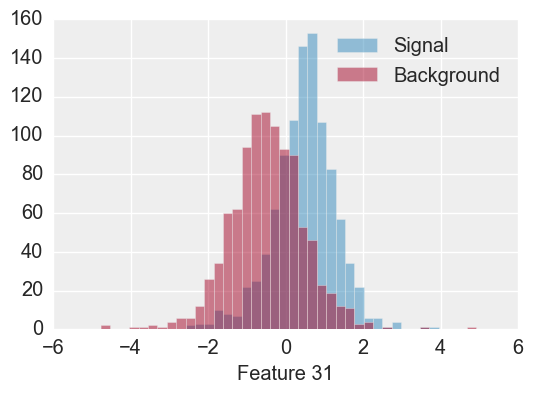

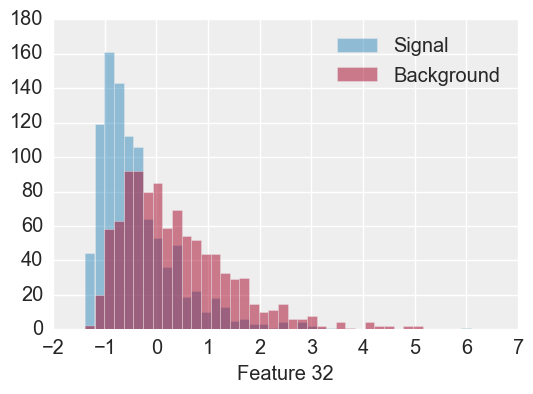

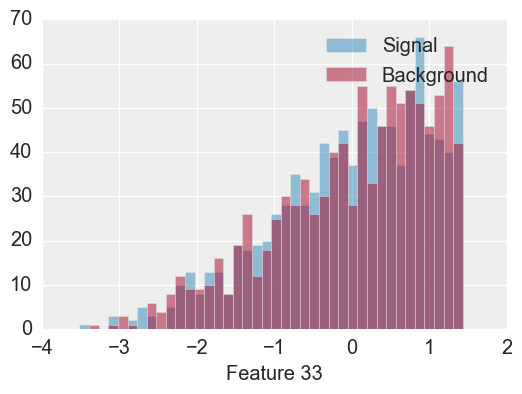

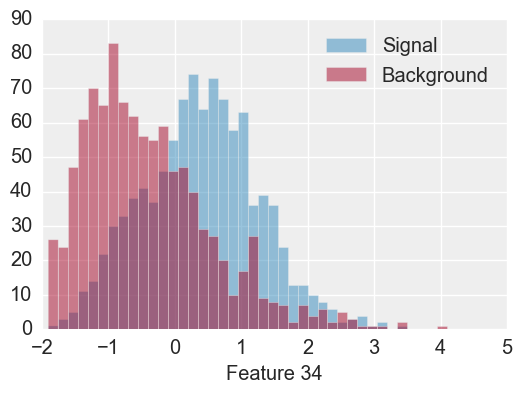

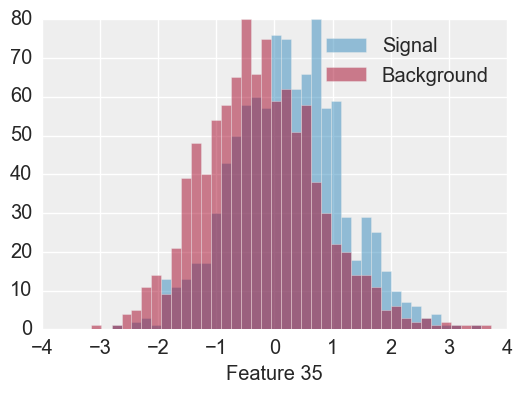

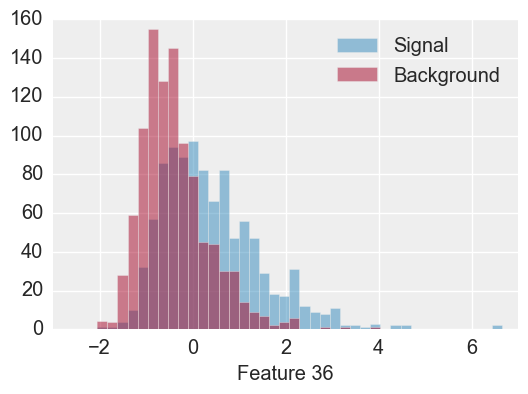

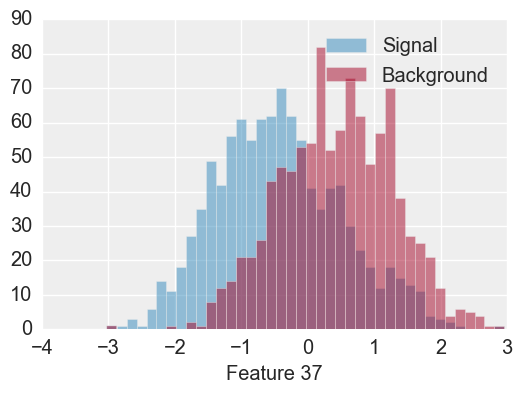

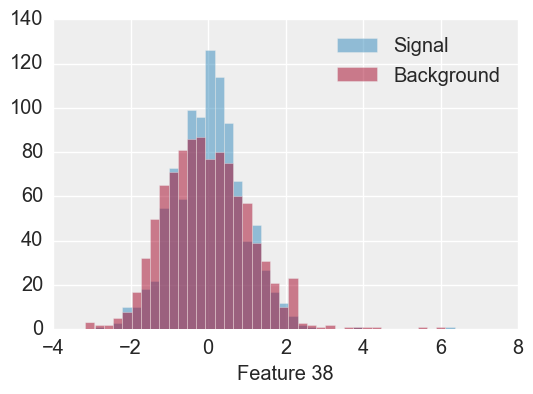

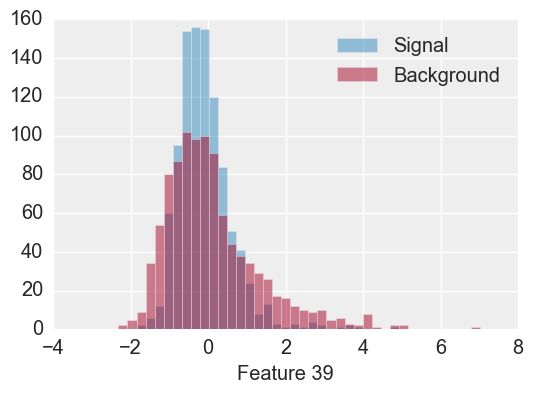

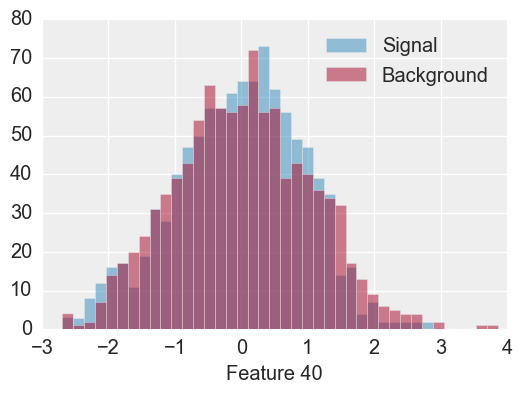

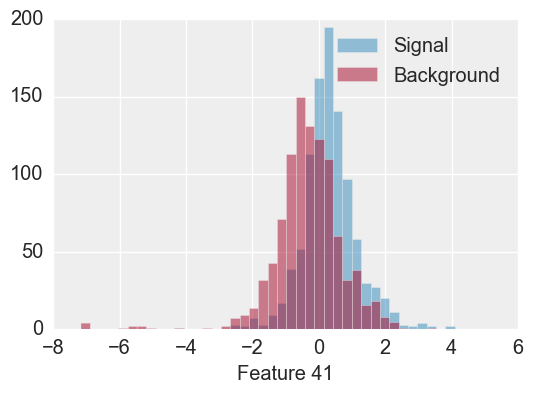

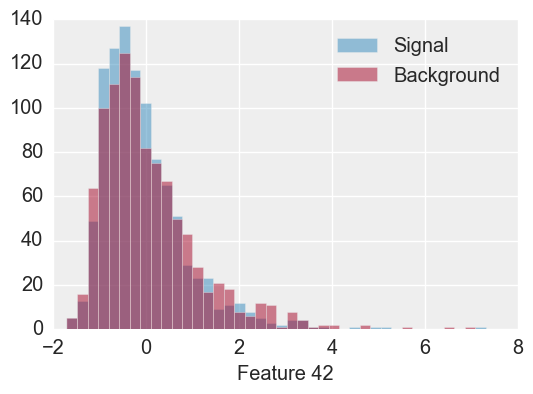

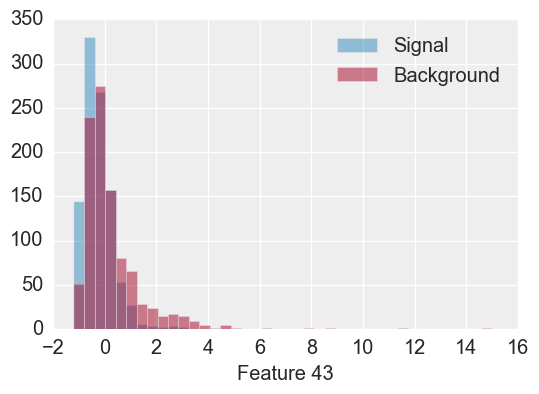

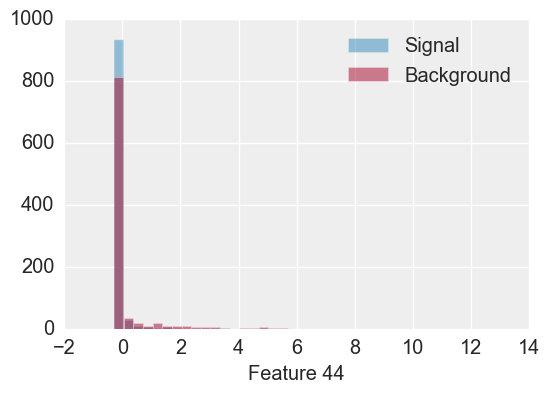

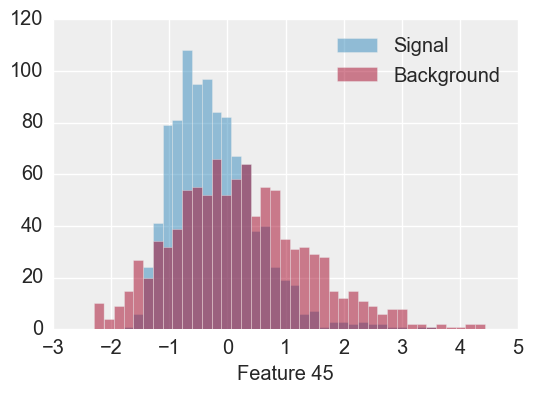

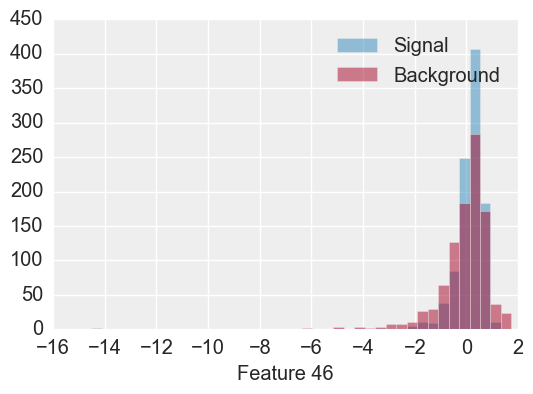

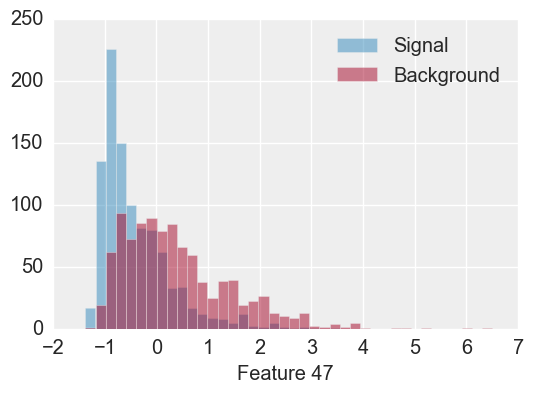

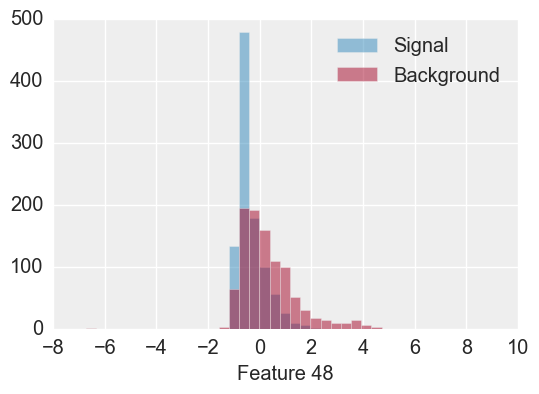

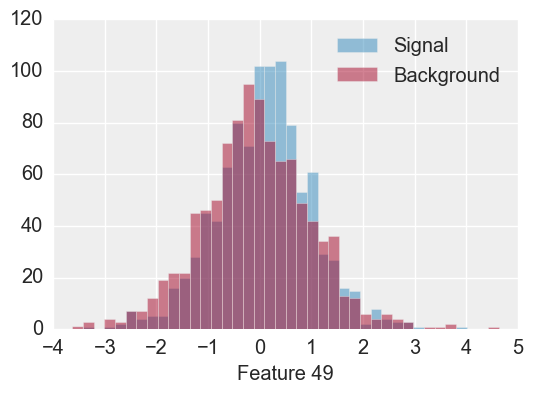

In [11]:
#Do some plotting
for col in range(50):
    plt.figure()
    #Extract signal and background for this column from pandas dataframe
    sig=mball[mball.sigback==0][col]
    back=mball[mball.sigback==1][col]
    #Get binning by merging the datasets, plotting, and returning the binning (index 1)
    bins=np.histogram(np.hstack((sig,back)), bins=40)[1]
    plt.hist(sig, label='Signal', alpha=0.5, bins=bins)
    plt.hist(back, label='Background', alpha=0.5, bins=bins)
    plt.xlabel('Feature %d'%col)
    plt.legend()
    plt.show()

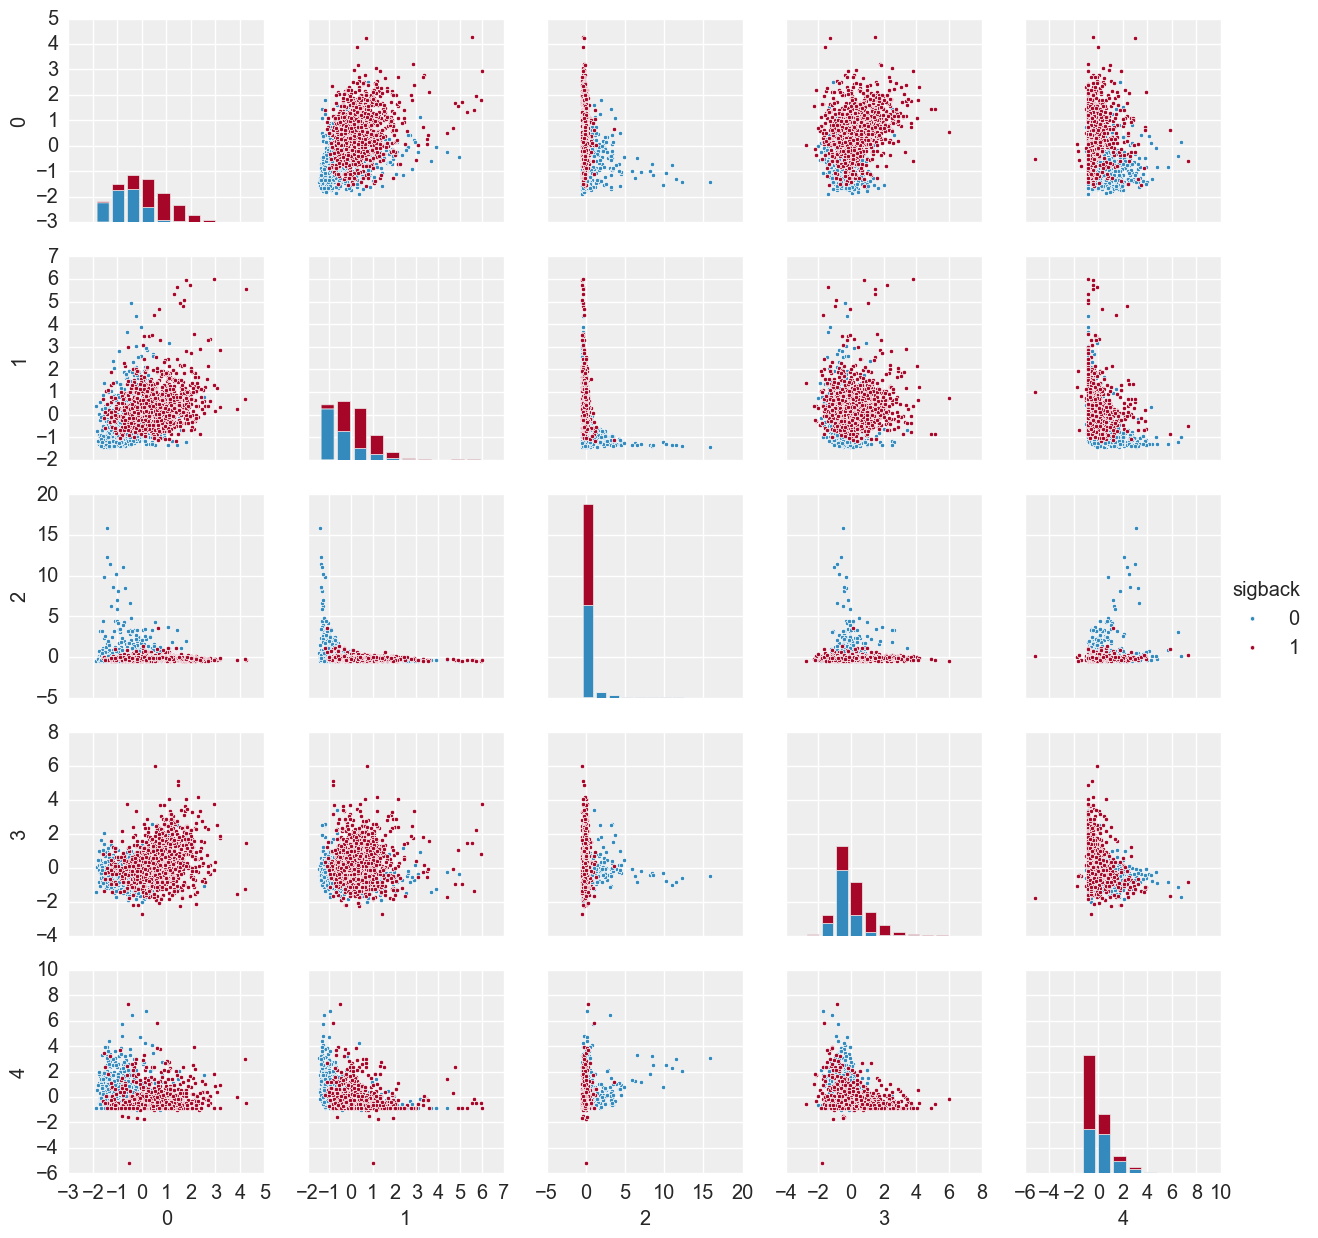

In [18]:
#Plot pairwise 2d correlation plots for the first 5 features
#Note: this uses the seaborn library
sns.pairplot(mball, hue="sigback", vars=[0,1,2,3,4], size=2.5, plot_kws=dict(s=10))